## Import Libraries

In [204]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb



## Load Data

In [145]:
# Load the data
transaction = pd.read_csv("/Users/abhi/Desktop/MSU/8. Coursework/3. Fall Semester/ITM885_Machine Learning/Mid Term/transactions.csv")
session = pd.read_csv("/Users/abhi/Desktop/MSU/8. Coursework/3. Fall Semester/ITM885_Machine Learning/Mid Term/sessions.csv")

## Basic EDA

In [146]:
# Check the data
transaction.head()

,conversion,session_id,session_dt,num_impressions,avg_relevance,num_search,train,score,test
0,False,JtAYcYYL7cU7rnY,2018-09-13,1,0.833254,0,True,False,False
1,False,Cm7ofJ1fABISzfx,2018-08-20,6,0.746600,2,True,False,False
2,True,LGygqNnJ79e5Xzi,2018-08-12,3,0.478077,0,True,False,False
3,True,k3HfpvFEioSrXQ6,2018-09-10,10,0.832537,4,True,False,False
4,False,4rFHx9qJTJ9uYiB,2018-08-28,4,0.964298,3,True,False,False


In [147]:
# Check the shape of the data
transaction.shape

(46287, 9)

In [148]:
# Check the data
session.head()

,user_id,session_id
0,005aCVlvg3,MlzFr96U43PlPv5
1,005aCVlvg3,UVzooUwtW4l2q7G
2,005aCVlvg3,9T8CDjkmFHdAJwg
3,00CFAV3zZI,tUsepyUccGtTgLZ
4,00CFAV3zZI,SoH4IpnNEm9aoNn


In [149]:
# Check the shape of the data
session.shape

(46787, 2)

## More Detailed EDA

In [150]:
# Check for number of unique users and sessions
unique_user_count = session['user_id'].nunique()
unique_session_count = session['session_id'].nunique()

# Print the unique user and session count
print(f'Unique User IDs: {unique_user_count}')
print(f'Unique Session IDs: {unique_session_count}')

Unique User IDs: 15500
Unique Session IDs: 46787


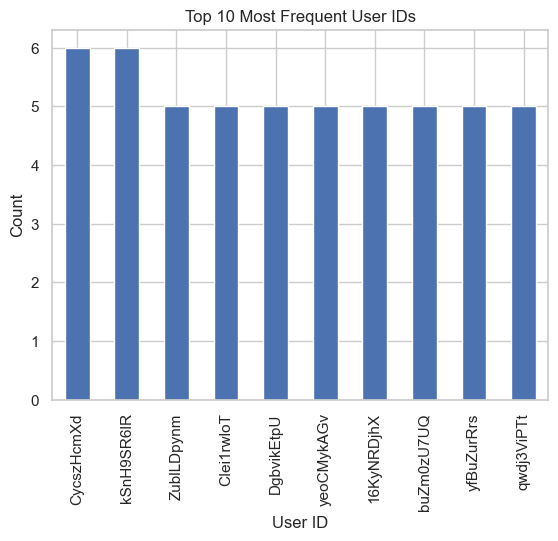

In [151]:
# Count the values of each user_id

user_id_counts = session['user_id'].value_counts()

# Plot the top N most frequent user_ids
N = 10
user_id_counts[:N].plot(kind='bar')
plt.title(f'Top {N} Most Frequent User IDs')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.show()

In [152]:
user_id_counts = session['user_id'].value_counts()
print(user_id_counts)

user_id
CycszHcmXd    6
kSnH9SR6lR    6
ZublLDpynm    5
CIei1rwloT    5
DgbvikEtpU    5
             ..
GIWv6RFdk6    1
2d3DjEv6cc    1
Gv1OshUijM    1
CaMfo0yicg    1
KSL66Fejd9    1
Name: count, Length: 15500, dtype: int64


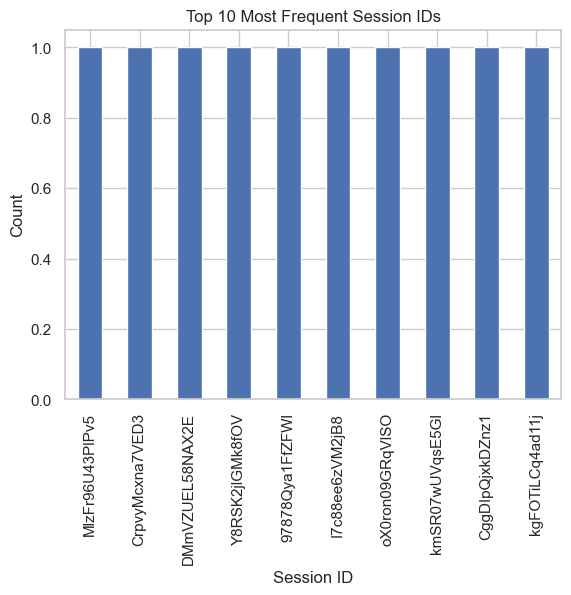

In [153]:
# Count the values of each session_id
session_id_counts = session['session_id'].value_counts()

# Plot the top N most frequent session_ids
session_id_counts[:N].plot(kind='bar')
plt.title(f'Top {N} Most Frequent Session IDs')
plt.xlabel('Session ID')
plt.ylabel('Count')
plt.show()


In [214]:
# Merge Transaction and Session Data
merged_df = pd.merge(transaction, session, on="session_id")

# Convert True or False to 1 or 0
merged_df["conversion"] = merged_df["conversion"].astype(int)


In [155]:
merged_df.head(10)

,conversion,session_id,session_dt,num_impressions,avg_relevance,num_search,train,score,test,user_id
0,0,JtAYcYYL7cU7rnY,2018-09-13,1,0.833254,0,True,False,False,s2v2cKUft9
1,0,Cm7ofJ1fABISzfx,2018-08-20,6,0.746600,2,True,False,False,u8N6Jl6qfX
2,1,LGygqNnJ79e5Xzi,2018-08-12,3,0.478077,0,True,False,False,6LRwCpyp62
3,1,k3HfpvFEioSrXQ6,2018-09-10,10,0.832537,4,True,False,False,Ju2TT9ARxP
4,0,4rFHx9qJTJ9uYiB,2018-08-28,4,0.964298,3,True,False,False,CQ20BLHd6z
5,1,TAJOY0tpGD7te2j,2018-09-17,10,0.547515,6,True,False,False,2gkP1TpmZZ
6,0,Bw0xKUMUXfHEdQO,2018-08-03,6,0.621987,3,True,False,False,TcryTqw1mL
7,1,Zzfr6PgFg5N1jYl,2018-09-15,8,0.812991,3,True,False,False,yAqb3YA77u
8,0,qNPHwvM3kbSSj5y,2018-08-04,1,0.353531,0,True,False,False,p1EnYutXVp
9,1,wgUwOUarosKDjHA,2018-08-14,10,0.638155,4,True,False,False,gtNnmhOPdz


In [156]:
# Checking for missing values
merged_df.isnull().sum() 

conversion         0
session_id         0
session_dt         0
num_impressions    0
avg_relevance      0
num_search         0
train              0
score              0
test               0
user_id            0
dtype: int64

In [157]:
# Calculate User Conversion Counts
user_conversion_counts = merged_df.groupby('user_id')['conversion'].value_counts().unstack(fill_value=0)

print(user_conversion_counts.head(10))

conversion  0  1
user_id         
005aCVlvg3  2  1
00CFAV3zZI  3  0
00LVEpIPZU  3  0
00ykE3lwb7  2  1
012oVtGE0U  3  1
01VaVEAVLb  3  0
01kO8LhodM  3  0
01kza8yeYE  3  0
02R8Y6QRG7  3  1
02VUyEv07A  3  0


In [158]:
# Calculate User Conversion Rate
user_conversion_rate = user_conversion_counts[1] / (user_conversion_counts[0] + user_conversion_counts[1])

print(user_conversion_rate)

user_id
005aCVlvg3    0.333333
00CFAV3zZI    0.000000
00LVEpIPZU    0.000000
00ykE3lwb7    0.333333
012oVtGE0U    0.250000
                ...   
zyIIAB5tCE    0.333333
zyIITc3Hx1    0.333333
zyt1BHzwKC    0.333333
zz54P5hcKK    0.000000
zzUp95llRz    0.333333
Length: 15000, dtype: float64


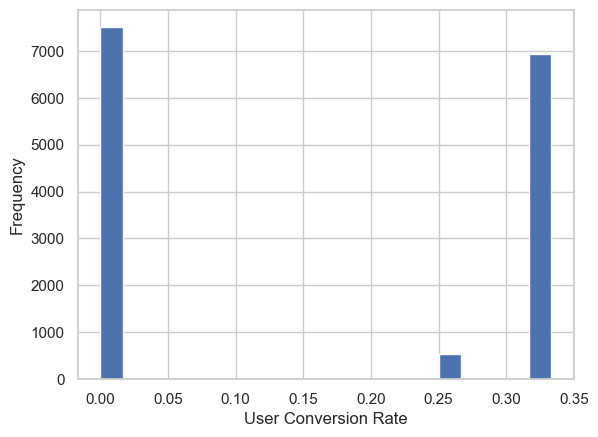

In [159]:
# Plot a histogram of user conversion rates
plt.hist(user_conversion_rate, bins=20)
plt.xlabel('User Conversion Rate')
plt.ylabel('Frequency')
plt.show()

In [160]:
user_conversion_rate = user_conversion_rate.reset_index(name='conversion_rate')

# Merge user_conversion_rate with merged_df
merged_df = merged_df.merge(user_conversion_rate, how='left', on='user_id')

In [161]:
merged_df.head(10)

,conversion,session_id,session_dt,num_impressions,avg_relevance,num_search,train,score,test,user_id,conversion_rate
0,0,JtAYcYYL7cU7rnY,2018-09-13,1,0.833254,0,True,False,False,s2v2cKUft9,0.000000
1,0,Cm7ofJ1fABISzfx,2018-08-20,6,0.746600,2,True,False,False,u8N6Jl6qfX,0.000000
2,1,LGygqNnJ79e5Xzi,2018-08-12,3,0.478077,0,True,False,False,6LRwCpyp62,0.333333
3,1,k3HfpvFEioSrXQ6,2018-09-10,10,0.832537,4,True,False,False,Ju2TT9ARxP,0.333333
4,0,4rFHx9qJTJ9uYiB,2018-08-28,4,0.964298,3,True,False,False,CQ20BLHd6z,0.000000
5,1,TAJOY0tpGD7te2j,2018-09-17,10,0.547515,6,True,False,False,2gkP1TpmZZ,0.333333
6,0,Bw0xKUMUXfHEdQO,2018-08-03,6,0.621987,3,True,False,False,TcryTqw1mL,0.000000
7,1,Zzfr6PgFg5N1jYl,2018-09-15,8,0.812991,3,True,False,False,yAqb3YA77u,0.333333
8,0,qNPHwvM3kbSSj5y,2018-08-04,1,0.353531,0,True,False,False,p1EnYutXVp,0.000000
9,1,wgUwOUarosKDjHA,2018-08-14,10,0.638155,4,True,False,False,gtNnmhOPdz,0.333333


In [162]:
# Create a new Dataframe for EDA
EDA_df = merged_df.drop(columns=['train','score','test'])

In [163]:
# Summary statistics
print(EDA_df.describe())

         conversion  num_impressions  avg_relevance    num_search  \
count  46287.000000     46287.000000   46287.000000  46287.000000   
mean       0.162033         5.389872       0.595406      2.618057   
std        0.368485         2.919273       0.233211      1.692384   
min        0.000000         0.000000       0.000144      0.000000   
25%        0.000000         3.000000       0.395587      1.000000   
50%        0.000000         5.000000       0.595431      3.000000   
75%        0.000000         8.000000       0.794726      4.000000   
max        1.000000        10.000000       0.999971      7.000000   

       conversion_rate  
count     46287.000000  
mean          0.162033  
std           0.163352  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.333333  
max           0.333333  


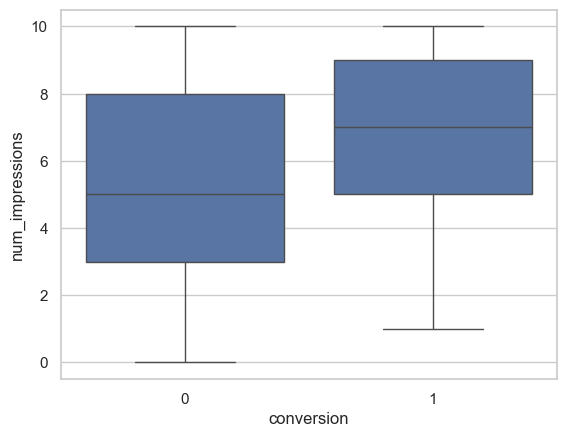

In [164]:
# Box plots for num_impressions vs. conversion
sns.boxplot(x='conversion', y='num_impressions', data=EDA_df)
plt.show()

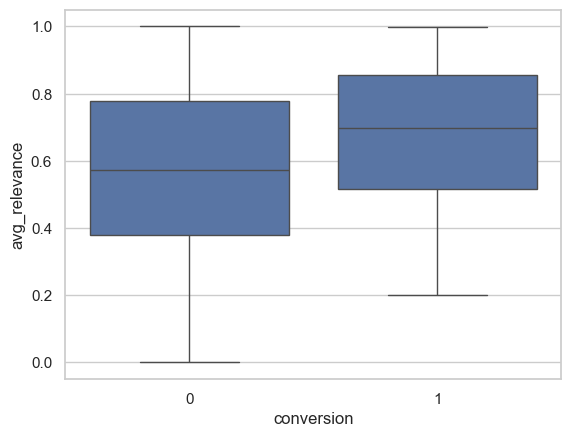

In [165]:
# Box plots for avg_relevance vs. conversion
sns.boxplot(x='conversion', y='avg_relevance', data=EDA_df)
plt.show()

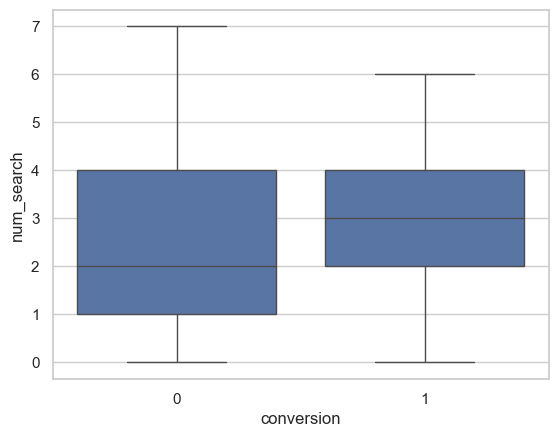

In [166]:
# Box plots for num_search vs. conversion
sns.boxplot(x='conversion', y='num_search', data=EDA_df)
plt.show()

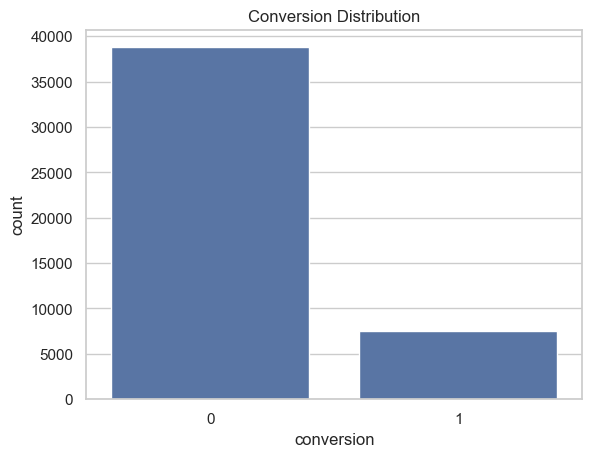

In [167]:
# Distribution of the target variable
sns.countplot(x='conversion', data=EDA_df)
plt.title('Conversion Distribution')
plt.show()

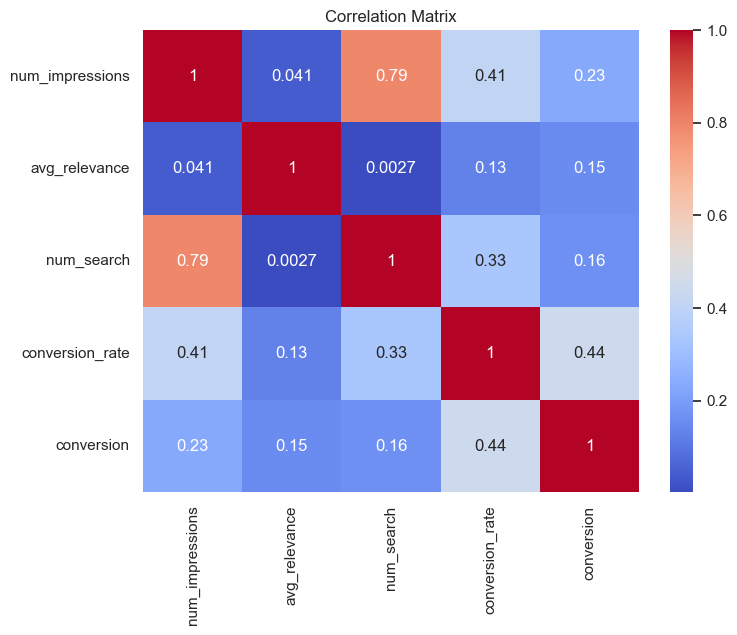

In [168]:
# Correlation matrix
correlation_matrix = EDA_df[["num_impressions","avg_relevance","num_search","conversion_rate","conversion"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

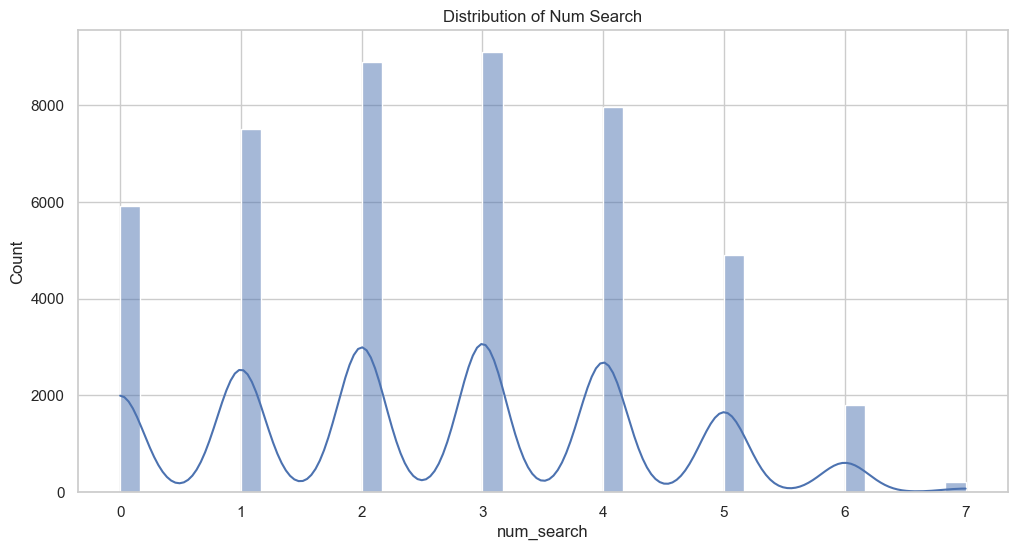

In [169]:
# Distribution of Num Search
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.histplot(EDA_df['num_search'], kde=True)
plt.title('Distribution of Num Search')
plt.show()

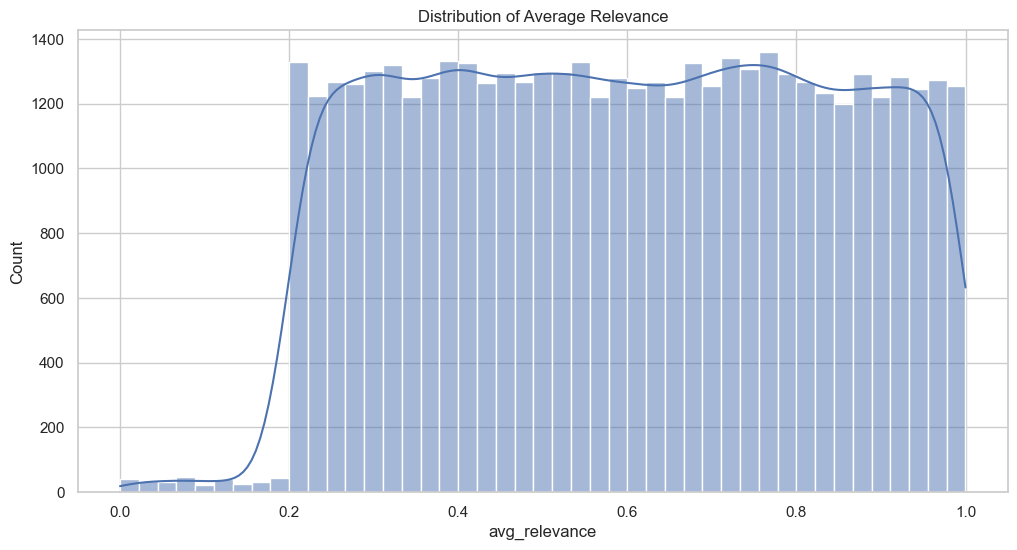

In [170]:
# Distribution of Average Relevance

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.histplot(EDA_df['avg_relevance'], kde=True)
plt.title('Distribution of Average Relevance')
plt.show()

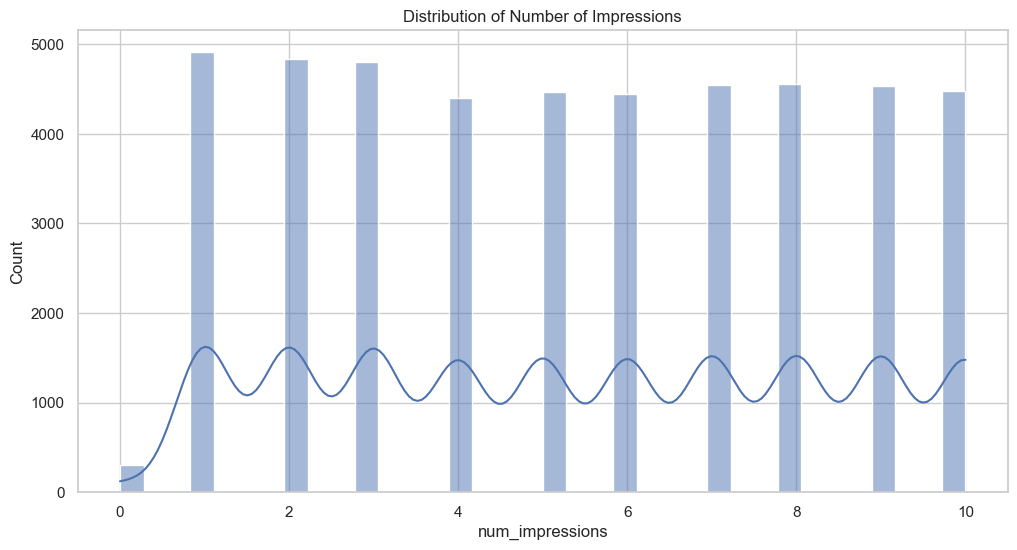

In [171]:
# Distribution of Number of Impressions

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.histplot(EDA_df['num_impressions'], kde=True)
plt.title('Distribution of Number of Impressions')
plt.show()

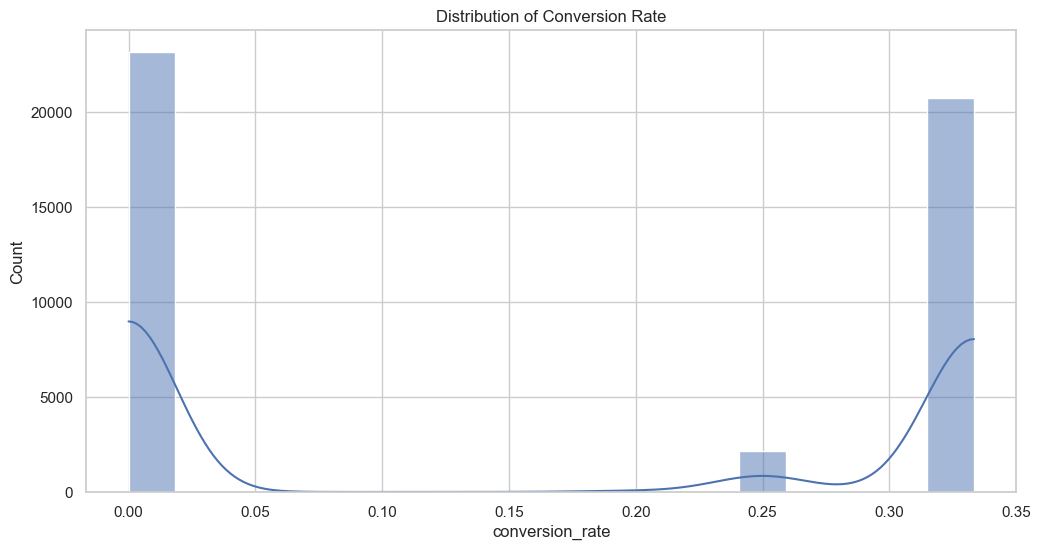

In [172]:
# Distribution of Conversion Rate (Similar to the graph we created earlier)

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.histplot(EDA_df['conversion_rate'], kde=True)
plt.title('Distribution of Conversion Rate')
plt.show()

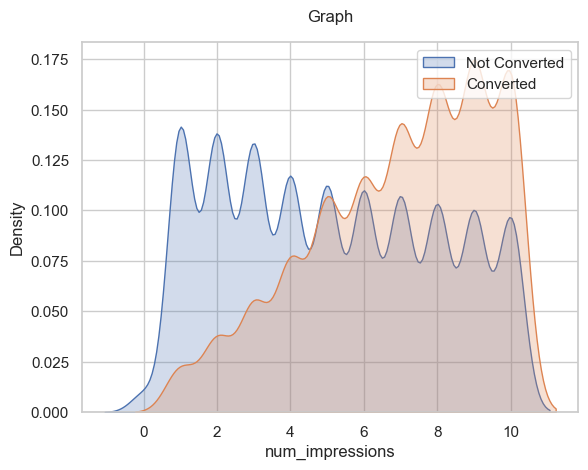

In [173]:
# Kernel density estimate (KDE) plot between num_impressions and conversion

sns.kdeplot(EDA_df.loc[EDA_df['conversion'] == 0, 'num_impressions'], label='Not Converted', fill=True)
sns.kdeplot(EDA_df.loc[EDA_df['conversion'] == 1, 'num_impressions'], label='Converted', fill=True)
plt.title('Graph',pad=15)
plt.legend()
plt.show()

## Spliting the Data - Train, Test and Validation

In [198]:
# Divide the Data Set to Train, Test and Validate

train_data = merged_df[merged_df['train'] == True]
test_data = merged_df[merged_df['test'] == True]
val_data = merged_df[merged_df['score'] == True]

In [199]:
# Drop unwanted columns

train_data = train_data.drop(columns=['train','score','test'])
test_data = test_data.drop(columns=['train','score','test'])
val_data = val_data.drop(columns=['train','score','test'])

In [200]:
# Split the data to features and target for train, val and test dataset

train_features = train_data[["avg_relevance",'num_impressions','num_search',"conversion_rate"]]
train_target = train_data['conversion']

val_features = val_data[["avg_relevance",'num_impressions','num_search',"conversion_rate"]]
val_target = val_data['conversion']

test_features = test_data[["avg_relevance",'num_impressions','num_search',"conversion_rate"]]
test_target = test_data['conversion']

## Models

#### Logistic Regression

In [195]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(train_features, train_target)

# Make predictions on the validation set
y_pred = model.predict(val_features)

# Calculate accuracy
accuracy = accuracy_score(val_target, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(val_target, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Assuming test_features is your preprocessed test data
test_predictions = model.predict(test_features)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(test_target, (test_predictions > 0.5).astype(int))
print(f'Test Accuracy: {test_accuracy:.2f}')

# Calculate ROC AUC score on the test data
test_roc_auc = roc_auc_score(test_target, test_predictions)
print(f'Test ROC AUC: {test_roc_auc:.2f}')

Accuracy: 0.84
ROC AUC: 0.50
Test Accuracy: 0.51
Test ROC AUC: 0.50


#### Regularization 

In [179]:
# Regularization strengths to try 
regularization_strengths = [ 0.01, 0.1, 1, 10, 100]

# Initialize lists to store accuracy scores for L1 and L2 regularization
l1_accuracies = []
l2_accuracies = []

for strength in regularization_strengths:
    # Fit a logistic regression model with L1 regularization on the training data
    l1_model = LogisticRegression(penalty='l1', C=1/strength, solver='liblinear')
    l1_model.fit(train_features, train_target)
    
    # Make predictions on the validation data
    l1_val_pred = l1_model.predict(val_features)
    
    # Calculate accuracy on the validation set
    l1_val_accuracy = accuracy_score(val_target, l1_val_pred)
    l1_accuracies.append(l1_val_accuracy)

    # Fit a logistic regression model with L2 regularization on the training data
    l2_model = LogisticRegression(penalty='l2', C=1/strength, solver='lbfgs')
    l2_model.fit(train_features, train_target)
    
    # Make predictions on the validation data
    l2_val_pred = l2_model.predict(val_features)
    
    # Calculate accuracy on the validation set
    l2_val_accuracy = accuracy_score(val_target, l2_val_pred)
    l2_accuracies.append(l2_val_accuracy)

# Find the best regularization strength for L1 and L2 based on the validation data
best_l1_strength = regularization_strengths[np.argmax(l1_accuracies)]
best_l2_strength = regularization_strengths[np.argmax(l2_accuracies)]

print(f'Best L1 Regularization Strength on Validation Data: {best_l1_strength}')
print(f'Best L2 Regularization Strength on Validation Data: {best_l2_strength}')
print(f'Accuracy with Best L1 Regularization Strength on Validation Data: {max(l1_accuracies)}')
print(f'Accuracy with Best L2 Regularization Strength on Validation Data: {max(l2_accuracies)}')

# Fit a logistic regression model with L1 and L2 regularization on the test data
l1_model = LogisticRegression(penalty='l1', C=1/best_l1_strength, solver='liblinear')
l1_model.fit(train_features, train_target)
l1_test_pred = l1_model.predict(test_features)
l1_test_accuracy = accuracy_score(test_target, l1_test_pred)

l2_model = LogisticRegression(penalty='l2', C=1/best_l2_strength, solver='lbfgs')
l2_model.fit(train_features, train_target)
l2_test_pred = l2_model.predict(test_features)
l2_test_accuracy = accuracy_score(test_target, l2_test_pred)

print(f'Accuracy with Best L1 Regularization Strength on Test Data: {l1_test_accuracy}')
print(f'Accuracy with Best L2 Regularization Strength on Test Data: {l2_test_accuracy}')

Best L1 Regularization Strength on Validation Data: 100
Best L2 Regularization Strength on Validation Data: 100
Accuracy with Best L1 Regularization Strength on Validation Data: 0.838
Accuracy with Best L2 Regularization Strength on Validation Data: 0.8377333333333333
Accuracy with Best L1 Regularization Strength on Test Data: 0.514
Accuracy with Best L2 Regularization Strength on Test Data: 0.514


#### Standardize the features

In [180]:
# Create a StandardScaler instance to standardize the data
scaler = StandardScaler() 

# Scale the training features and store in X_train, X_val and X_test
X_train = scaler.fit_transform(train_features)
X_val = scaler.transform(val_features)
X_test = scaler.transform(test_features)  

# Create a Logistic Regression model instance
model = LogisticRegression()

# Fit the Logistic Regression model on the standardized training data
model.fit(X_train, train_target)

# Make predictions on the validation data
val_pred = model.predict(X_val)
    
# Calculate accuracy on the validation set
val_accuracy = accuracy_score(val_target, val_pred)
print(f'Accuracy on the Validation set: {val_accuracy:.2f}')

# Make predictions on the standardized test data
test_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(test_target, test_pred)
print(f'Accuracy on the Test set: {test_accuracy:.2f}')


Accuracy on the Validation set: 0.83
Accuracy on the Test set: 0.53


#### Decision Tree Classifier

In [181]:
# Create a DecisionTreeClassifier instance
dtree = DecisionTreeClassifier()

# Fit the Decision Tree model on the training data
dtree = dtree.fit(train_features,train_target)

# Make predictions on the validation data
dval_pred = dtree.predict(val_features)

# Calculate accuracy on the validation set
dval_accuracy = accuracy_score(val_target, dval_pred)
print(f'Accuracy on the Validation set: {dval_accuracy:.2f}')

# Make predictions on the test data
dtest_pred = dtree.predict(test_features)

# Calculate accuracy on the test set
dtree_accuracy = accuracy_score(test_target, dtest_pred)
print(f'Accuracy on the Test set: {dtree_accuracy:.2f}')


Accuracy on the Validation set: 0.80
Accuracy on the Test set: 0.70


#### XGBoost

In [185]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(train_features, train_target)

# Make predictions on the validation set
y_pred = model.predict(val_features)

# Calculate accuracy
accuracy = accuracy_score(val_target, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(val_target, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Assuming test_features is your preprocessed test data
test_predictions = model.predict(test_features)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(test_target, (test_predictions > 0.5).astype(int))
print(f'Test Accuracy: {test_accuracy:.2f}')

# Calculate ROC AUC score on the test data
test_roc_auc = roc_auc_score(test_target, test_predictions)
print(f'Test ROC AUC: {test_roc_auc:.2f}')

Accuracy: 0.83
ROC AUC: 0.56
Test Accuracy: 0.59
Test ROC AUC: 0.58


#### Day, Date and Month Extraction

In [186]:
merged_date = merged_df.copy()

# Convert to datetime
merged_date['session_dt'] = pd.to_datetime(merged_date['session_dt'])  

# Extract relevant date features
merged_date['month'] = merged_date['session_dt'].dt.month
merged_date['day'] = merged_date['session_dt'].dt.day
merged_date['day_of_week'] = merged_date['session_dt'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'session_dt' column
merged_date = merged_date.drop(columns=['session_dt'])

merged_date.head()

,conversion,session_id,num_impressions,avg_relevance,num_search,train,score,test,user_id,conversion_rate,month,day,day_of_week
0,0,JtAYcYYL7cU7rnY,1,0.833254,0,True,False,False,s2v2cKUft9,0.000000,9,13,3
1,0,Cm7ofJ1fABISzfx,6,0.746600,2,True,False,False,u8N6Jl6qfX,0.000000,8,20,0
2,1,LGygqNnJ79e5Xzi,3,0.478077,0,True,False,False,6LRwCpyp62,0.333333,8,12,6
3,1,k3HfpvFEioSrXQ6,10,0.832537,4,True,False,False,Ju2TT9ARxP,0.333333,9,10,0
4,0,4rFHx9qJTJ9uYiB,4,0.964298,3,True,False,False,CQ20BLHd6z,0.000000,8,28,1


In [187]:
# Divide the Data Set to Train, Test and Validate

train_data = merged_date[merged_date['train'] == True]
test_data = merged_date[merged_date['test'] == True]
val_data = merged_date[merged_date['score'] == True]

train_data = train_data.drop(columns=['train','score','test',"user_id","session_id"]).astype(int)
test_data = test_data.drop(columns=['train','score','test',"user_id","session_id"]).astype(int)
val_data = val_data.drop(columns=['train','score','test',"user_id","session_id"]).astype(int)

train_target = train_data['conversion']
train_features = train_data.drop(columns=['conversion'])

val_target = val_data['conversion']
val_features = val_data.drop(columns=['conversion'])

test_target = test_data['conversion']
test_features = test_data.drop(columns=['conversion'])


In [188]:
# Initialize the RandomUnderSampler
rus = RandomOverSampler(random_state=42)

# Perform random undersampling on your dataset
X_resampled, y_resampled = rus.fit_resample(train_features, train_target)

# Initialize a logistic regression model
lr_model = LogisticRegression()

# Train the logistic regression model on the undersampled data
lr_model.fit(X_resampled, y_resampled)

# Make predictions on your validation or test set
y_pred = lr_model.predict(val_features)  # Replace X_val with your validation or test data

# Calculate accuracy on the validation or test data
accuracy = accuracy_score(val_target, y_pred)  # Replace y_val with your validation or test labels

print(f'Accuracy on the validation: {accuracy:.2f}')

# Make predictions on your validation or test set
test_pred = lr_model.predict(test_features)  # Replace X_val with your validation or test data

# Calculate accuracy on the validation or test data
test_accuracy = accuracy_score(test_target, test_pred)  # Replace y_val with your validation or test labels

print(f'Accuracy on the test: {test_accuracy:.2f}')


Accuracy on the validation: 0.62
Accuracy on the test: 0.70


#### Random Under Sampling

In [182]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform random undersampling on your dataset
X_resampled, y_resampled = rus.fit_resample(train_features, train_target)

# Initialize a logistic regression model
lr_model = LogisticRegression()

# Train the logistic regression model on the undersampled data
lr_model.fit(X_resampled, y_resampled)

# Make predictions on your validation or test set
y_pred = lr_model.predict(val_features)

# Calculate accuracy on the validation or test data
accuracy = accuracy_score(val_target, y_pred) 

print(f'Accuracy on the validation: {accuracy:.2f}')

# Make predictions on your validation or test set
test_pred = lr_model.predict(test_features) 

# Calculate accuracy on the validation or test data
test_accuracy = accuracy_score(test_target, test_pred)

print(f'Accuracy on the test: {test_accuracy:.2f}')

Accuracy on the validation: 0.69
Accuracy on the test: 0.97


#### Feature Selection and Random Over Sampling

In [183]:
# Define different sets of features
feature_sets = {
    "Set 1": ["num_impressions"],
    "Set 2": ["num_search"],
    "Set 3": ["avg_relevance"],
    "Set 4": ["conversion_rate"],
    "Set 5": ["num_impressions", "avg_relevance"],
    "Set 6": ["num_impressions", "num_search"],
    "Set 7": ["num_impressions", "conversion_rate"],
    "Set 8": ["avg_relevance", "num_search"],
    "Set 9": ["avg_relevance", "conversion_rate"],
    "Set 10": ["num_search", "conversion_rate"],
    "Set 11": ["num_impressions", "avg_relevance", "num_search"],
    "Set 12": ["num_impressions", "avg_relevance", "conversion_rate"],
    "Set 13": ["num_impressions", "num_search", "conversion_rate"],
    "Set 14": ["avg_relevance", "num_search", "conversion_rate"],
    "Set 15": ["num_impressions", "avg_relevance", "num_search", "conversion_rate"]
}

# Initialize a dictionary to store accuracy for each feature set
accuracy_results = {}

# Train and evaluate models for each feature set
for set_name, feature_list in feature_sets.items():

    # Select the features for the current set
    train_features_set = train_data[feature_list]
    val_features_set = val_data[feature_list]
    test_features_set = test_data[feature_list]

    # Initialize the RandomUnderSampler
    rus = RandomOverSampler(random_state=42)

    # Perform random undersampling on your dataset
    X_resampled, y_resampled = rus.fit_resample(train_features_set, train_target)

    # Initialize a logistic regression model
    lr_model = LogisticRegression()

    # Train the logistic regression model on the undersampled data
    lr_model.fit(X_resampled, y_resampled)

    # Make predictions on your validation or test set
    y_pred = lr_model.predict(val_features_set) 

    # Calculate accuracy on the validation or test data
    accuracy = accuracy_score(val_target, y_pred)

    print(f'Accuracy on the validation for {set_name}: {accuracy:.2f}')

    # Make predictions on your validation or test set
    test_pred = lr_model.predict(test_features_set)

    # Calculate accuracy on the validation or test data
    test_accuracy = accuracy_score(test_target, test_pred)

    print(f'Accuracy on the test for {set_name}: {test_accuracy:.2f}')

    accuracy_results[set_name] = test_accuracy

    # Calculate AUC score
    auc_score = roc_auc_score(test_target, test_pred)

    print(f'AUC Score for {set_name}: {auc_score:.2f}')

    # Calculate recall score
    recall = recall_score(test_target, test_pred)

    print(f'Recall for {set_name}: {recall:.2f}')

# Print the accuracy results for each feature set
for set_name, test_accuracy in accuracy_results.items():
    print(f"{set_name}: Accuracy = {test_accuracy:.2f}")

Accuracy on the validation for Set 1: 0.64
Accuracy on the test for Set 1: 0.71
AUC Score for Set 1: 0.71
Recall for Set 1: 0.61
Accuracy on the validation for Set 2: 0.56
Accuracy on the test for Set 2: 0.70
AUC Score for Set 2: 0.70
Recall for Set 2: 0.70
Accuracy on the validation for Set 3: 0.56
Accuracy on the test for Set 3: 0.63
AUC Score for Set 3: 0.63
Recall for Set 3: 0.59
Accuracy on the validation for Set 4: 0.69
Accuracy on the test for Set 4: 0.96
AUC Score for Set 4: 0.96
Recall for Set 4: 0.92
Accuracy on the validation for Set 5: 0.64
Accuracy on the test for Set 5: 0.76
AUC Score for Set 5: 0.76
Recall for Set 5: 0.67
Accuracy on the validation for Set 6: 0.62
Accuracy on the test for Set 6: 0.71
AUC Score for Set 6: 0.71
Recall for Set 6: 0.64
Accuracy on the validation for Set 7: 0.69
Accuracy on the test for Set 7: 0.97
AUC Score for Set 7: 0.97
Recall for Set 7: 0.94
Accuracy on the validation for Set 8: 0.63
Accuracy on the test for Set 8: 0.73
AUC Score for Set

## Final Model

In [207]:
train_features_set = train_data[["avg_relevance", "num_search", "conversion_rate"]]
val_features_set = val_data[["avg_relevance", "num_search", "conversion_rate"]]
test_features_set = test_data[["avg_relevance", "num_search", "conversion_rate"]]

# Initialize the RandomUnderSampler
rus = RandomOverSampler(random_state=42)

# Perform random undersampling on your dataset
X_resampled, y_resampled = rus.fit_resample(train_features_set, train_target)

# Initialize a logistic regression model
lr_model = LogisticRegression()

# Train the logistic regression model on the undersampled data
lr_model.fit(X_resampled, y_resampled)

# Make predictions on your validation or test set
y_pred = lr_model.predict(val_features_set)

# Calculate accuracy on the validation or test data
accuracy = accuracy_score(val_target, y_pred) 

print(f'Accuracy on the validation: {accuracy:.2f}')

# Make predictions on your validation or test set
test_pred = lr_model.predict(test_features_set) 

# Calculate accuracy on the validation or test data
test_accuracy = accuracy_score(test_target, test_pred)

print(f'Accuracy on the test: {test_accuracy:.2f}')

# Calculate AUC score
auc_score = roc_auc_score(test_target, test_pred)

print(f'AUC Score: {auc_score:.2f}')

# Calculate recall score
recall = recall_score(test_target, test_pred)

print(f'Recall: {recall:.2f}')


Accuracy on the validation: 0.69
Accuracy on the test: 0.97
AUC Score: 0.97
Recall: 0.95


In [338]:
new_df = merged_df.copy()

In [339]:
avg_impressions = new_df.groupby('user_id')['num_impressions'].mean()
avg_search = new_df.groupby('user_id')['num_search'].mean()

#new_df["ad_relevance"] = new_df["avg_relevance"] * new_df["num_impressions"]

new_df = pd.merge(new_df, avg_impressions, on="user_id",suffixes=('', '_avg'))
new_df = pd.merge(new_df, avg_search, on="user_id",suffixes=('', '_avg'))

new_df = new_df[["conversion", "num_impressions_avg","num_search_avg",'train','score','test']]

print(new_df.head(10))

   conversion  num_impressions_avg  num_search_avg  train  score   test
0           0             3.000000        1.333333   True  False  False
1           0             3.000000        1.333333   True  False  False
2           0             3.000000        1.333333   True  False  False
3           0             3.750000        2.750000   True  False  False
4           0             3.750000        2.750000   True  False  False
5           0             3.750000        2.750000   True  False  False
6           0             3.750000        2.750000   True  False  False
7           1             7.333333        3.333333   True  False  False
8           0             7.333333        3.333333   True  False  False
9           0             7.333333        3.333333   True  False  False


In [345]:
train_data = new_df[new_df['train'] == True]
test_data = new_df[new_df['test'] == True]
val_data = new_df[new_df['score'] == True]

train_data = train_data.drop(columns=['train','score','test']).astype(int)
test_data = test_data.drop(columns=['train','score','test']).astype(int)
val_data = val_data.drop(columns=['train','score','test']).astype(int)

train_target = train_data['conversion']
train_features = train_data.drop(columns=['conversion'])

val_target = val_data['conversion']
val_features = val_data.drop(columns=['conversion'])

test_target = test_data['conversion']
test_features = test_data.drop(columns=['conversion'])

In [346]:
print(train_features)

       num_impressions_avg  num_search_avg
0                        3               1
1                        3               1
2                        3               1
3                        3               2
4                        3               2
...                    ...             ...
46159                    3               2
46205                    6               2
46215                    2               2
46231                    4               3
46232                    4               3

[31287 rows x 2 columns]


In [348]:
# Initialize the RandomUnderSampler
rus = RandomOverSampler(random_state=42)

# Perform random undersampling on your dataset
X_resampled, y_resampled = rus.fit_resample(train_features, train_target)

# Initialize a logistic regression model
#model = LogisticRegression(class_weight={0:1,1:7},C=1/100,penalty='l2',solver='liblinear')
model = LogisticRegression()

# Train the logistic regression model on the undersampled data
model.fit(X_resampled, y_resampled)

# Make predictions on your validation or test set
y_pred = model.predict(val_features)

# Calculate accuracy on the validation or test data
accuracy = accuracy_score(val_target, y_pred) 

print(f'Accuracy on the validation: {accuracy:.2f}')

# Make predictions on your validation or test set
test_pred = model.predict(test_features) 

# Calculate accuracy on the validation or test data
test_accuracy = accuracy_score(test_target, test_pred)

print(f'Accuracy on the test: {test_accuracy:.2f}')

# Calculate AUC score
auc_score = roc_auc_score(test_target, test_pred)

print(f'AUC Score: {auc_score:.2f}')

# Calculate recall score
recall = recall_score(test_target, test_pred)

print(f'Recall: {recall:.2f}')


Accuracy on the validation: 0.68
Accuracy on the test: 0.83
AUC Score: 0.83
Recall: 0.73
